In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [6]:
#we will load the dataset from file into memory
bitcoin_dataset = pd.read_csv(r'C:/Users/user/python-projects\sklearn-project/bitcoin price prediction/bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [7]:
#showing the data
bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


In [8]:
#checking for nulls
bitcoin_dataset.isnull().sum()

Timestamp                  0
Open                 1243472
High                 1243472
Low                  1243472
Close                1243472
Volume_(BTC)         1243472
Volume_(Currency)    1243472
Weighted_Price       1243472
dtype: int64

In [9]:
#we need to know about how much percent of data is required for proper dataset
bitcoin_dataset.isnull().mean().round(4) * 100

Timestamp             0.0
Open                 26.3
High                 26.3
Low                  26.3
Close                26.3
Volume_(BTC)         26.3
Volume_(Currency)    26.3
Weighted_Price       26.3
dtype: float64

In [10]:
#in each row we have like 26.3% null values. Even though it's lot of null data, it's still invalid and so safe to delete!!!
bitcoin_dataset.dropna(inplace=True)

In [11]:
#now we can inspect the null free dataser!!
bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


In [12]:
#for more visualization, we need to import seaborn and matplotlib
import seaborn as sbn
import matplotlib.pyplot as plt

<AxesSubplot:>

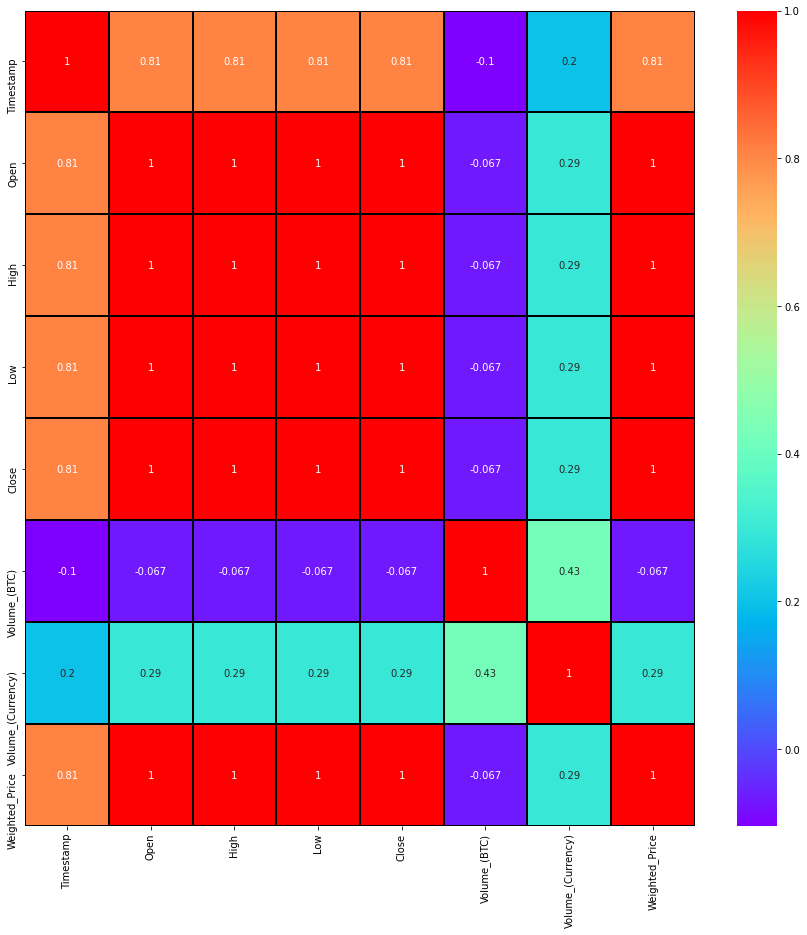

In [13]:
#correlation helps us to find out which of the fields are related to each other..
plt.figure(figsize=(15, 15))
sbn.heatmap(bitcoin_dataset.corr(), annot=True, cmap='rainbow', linewidths=1, linecolor='black')

In [14]:
#we should change the names of column just in case to avoid any feature errors
bitcoin_dataset.rename(columns={"Volume_(BTC)" : "Volume_BTC", "Volume_(Currency)" : "Volume_Currency"}, inplace=True)

In [15]:
#similarly, we need to get the timestamp values to be human understandable
bitcoin_dataset['New_Dates'] = pd.to_datetime(bitcoin_dataset['Timestamp'], unit='s')

bitcoin_dataset

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price,New_Dates
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00
...,...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798,2020-12-30 23:56:00
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863,2020-12-30 23:57:00
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266,2020-12-30 23:58:00
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831,2020-12-30 23:59:00


In [16]:
required_features = ['Open', 'High', 'Low', 'Volume_BTC', 'Volume_Currency', 'Weighted_Price']
output_label = 'Close'

In [17]:
#we need to split our data as:
#         70% data will be used as training data
#         30% data will be used as testing data
# To achieve this we will use train_test_split from sklearn

from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    bitcoin_dataset[required_features],
    bitcoin_dataset[output_label],
    test_size = 0.3
)

In [19]:
#we will first try fitting our data using LinearRegression

from sklearn.linear_model import LinearRegression

In [20]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [21]:
#our model is ready!! Time to test accuracy!!!
regression_model.score(X_test, y_test)

0.9999990422815291

In [22]:
# We got 99% accuracy on our test data also..that means our model is quite good
#now we can test for actual predictions!!

#we will take some data from test set and try to predict that

#we will take row number 55 from our original dataset, i.e from one before splitting
sample_data = bitcoin_dataset.iloc[55]
sample_data

Timestamp                   1325875320
Open                               6.4
High                               6.4
Low                                6.4
Close                              6.4
Volume_BTC                    9.110853
Volume_Currency              58.309457
Weighted_Price                     6.4
New_Dates          2012-01-06 18:42:00
Name: 9290, dtype: object

In [23]:
#we create sample dataframe
sample = [[6.4, 6.4, 6.4, 9.11, 58, 6.4]]
regression_model.predict(sample)

array([6.38404637])

In [24]:
#from above, it's clear that original price was 6.4 and out model predicted it as 6.3902 which is pretty much equal!!

In [25]:
#to make predictions of future values we will need to shift data by 30 days!!
future_set = bitcoin_dataset.shift(periods=30).tail(30)

In [26]:
regression_model.predict(future_set[required_features])

array([28718.49414635, 28733.15059715, 28732.72908901, 28762.39096183,
       28768.23031417, 28779.95859469, 28776.26659273, 28773.16028889,
       28750.36262038, 28708.30796794, 28703.51900051, 28696.67416706,
       28659.21035118, 28668.91723174, 28663.11406465, 28703.46392108,
       28727.39522907, 28748.95644074, 28774.64111359, 28795.78342892,
       28816.33302773, 28832.20613183, 28872.37046623, 28850.63301884,
       28852.07195026, 28829.2702654 , 28830.99215293, 28845.6488053 ,
       28828.46959656, 28846.57470765])

In [27]:
#similarly we can use r2_score to see our accuracy
from sklearn.metrics import r2_score

In [28]:
predictions = regression_model.predict(X_test)
print('Accuracy of model : ', r2_score(predictions, y_test))

Accuracy of model :  0.9999990422822038
